<a href="https://colab.research.google.com/github/AlexUrtubia/prediccion_ventas_comida/blob/main/Sales_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta última parte del proyecto, el objetivo es optimizar los modelos predictivos hasta encontrar los resultados más óptimos.

In [ ]:
# Como siempre en primer lugar, es necesario importar las librerías esenciales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Se crea el df desde el directorio en Google Drive
df = pd.read_csv('/content/drive/MyDrive/Proyecto1/df_X.csv')
df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Low Fat,Regular,Baking Goods,Breads,Breakfast,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,13.65,0.012741,57.6588,1987,343.5528,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,19.00,0.127470,107.7622,1985,4022.7636,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
5,16.20,0.016687,96.9726,2002,1076.5986,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6,19.20,0.094450,187.8214,2007,4710.5350,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
7,18.50,0.045464,144.1102,1997,2187.1530,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
8,15.10,0.100014,145.4786,1999,1589.2646,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
9,17.60,0.047257,119.6782,1997,2145.2076,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


Como vimos anteriormente, al aplicar una correlación entre la columna objetivo y las demás, se observa que del resto de columnas, algunas tienen una mayor influencia sobre esta que otras.

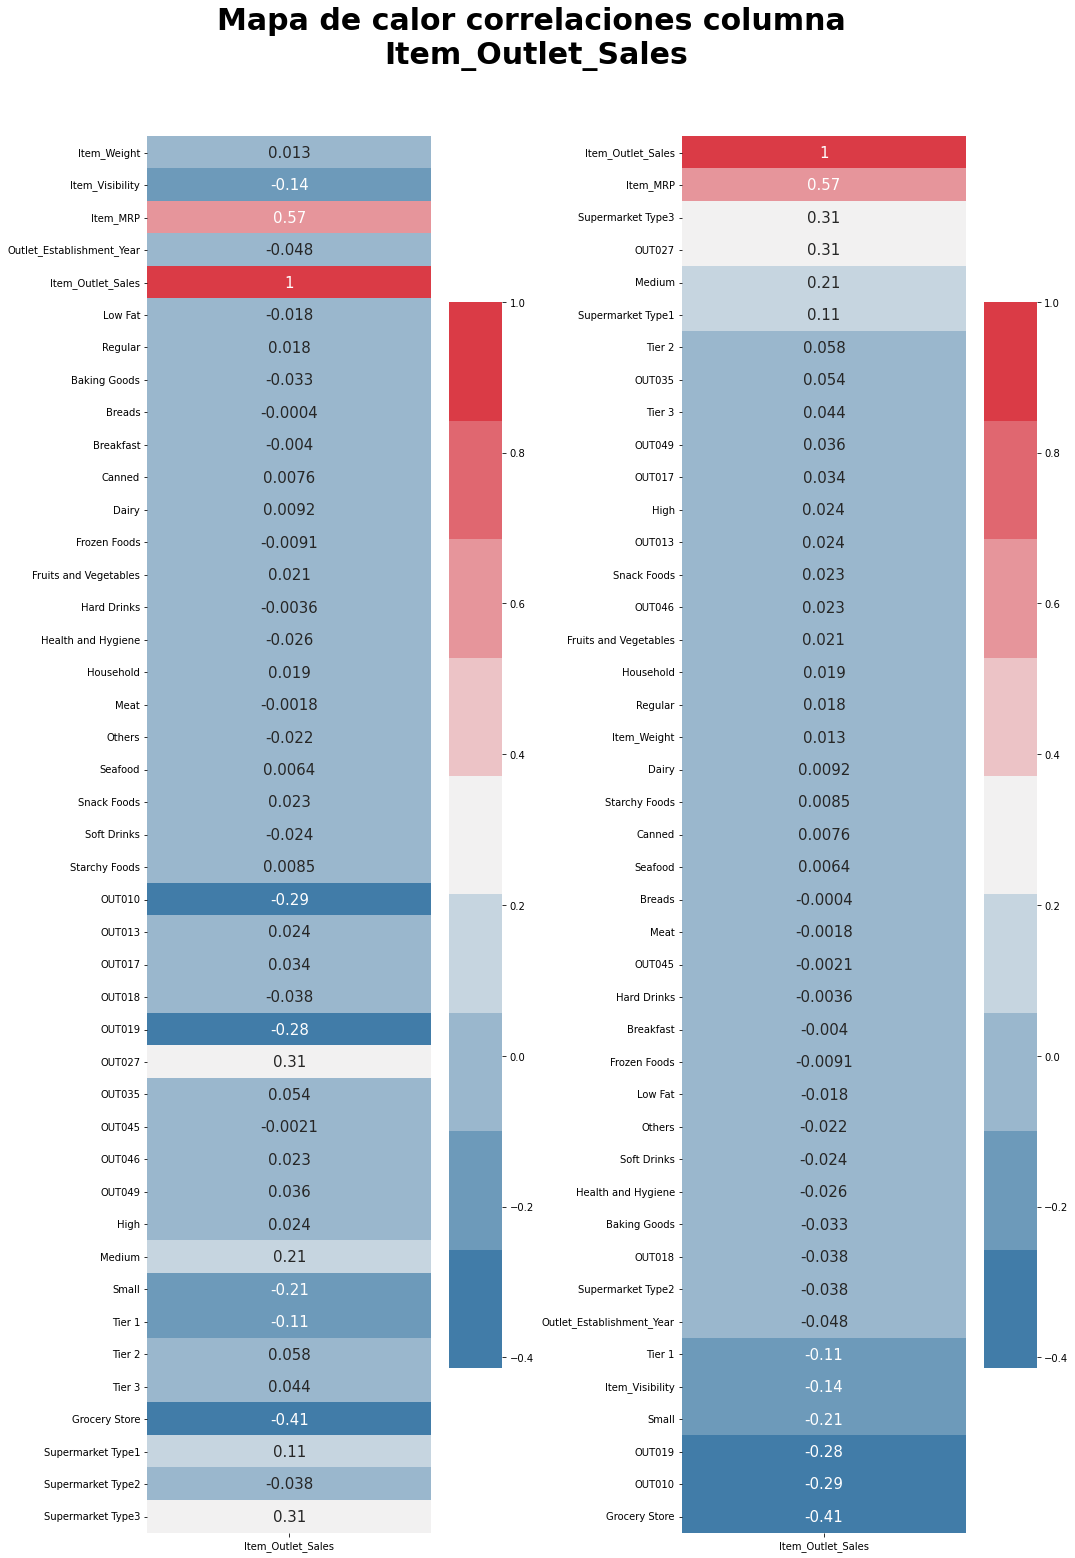

In [ ]:
it_sal_corr = pd.DataFrame(df.corr().loc[:,'Item_Outlet_Sales'])
# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
fig1 = plt.figure(figsize=(15,20))
plt.suptitle("Mapa de calor correlaciones columna \nItem_Outlet_Sales",fontsize=30, fontweight='bold', y=1.08)

# Cada figura queda definida bajo un 'ax' que corresponde a un subplot diferente, que para el caso de esta figura, tiene 3 filas y dos columnas

ax1 = fig1.add_subplot(1,2,1) 
sns.heatmap(it_sal_corr, cmap = sns.diverging_palette(240, 10, n=9), annot=True,
                  annot_kws={"size": 15})

ax2 = fig1.add_subplot(1,2,2) 
sns.heatmap(it_sal_corr.sort_values(by='Item_Outlet_Sales', ascending=False), cmap = sns.diverging_palette(240, 10, n=9), annot=True,
                  annot_kws={"size": 15})
fig1.tight_layout()
plt.show()

En las columnas que quedan al centro del gráfico, se observa que la influencia que tienen sobre las ventas es muy baja, y poe ende se deciden eliminarlas del df para analizar como luce el modelo luego de reducir la cantidad de información que debe procesar.

Precisamente las columnas del centro son aquellas relacionadas con el tipo de comida, por lo que se eliminarán consultando si coinciden con las de este tipo en el dataframe original.

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Proyecto1/df_sin_v0.csv')
df_original.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,FDP10,19.00,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
5,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
6,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
7,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
8,FDX32,15.10,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
9,FDS46,17.60,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076


In [ ]:
# Se crea una lista con los valores únicos de la columna Item Type
eliminar = df_original['Item_Type'].unique()

In [ ]:
# Se recorren las columnas del df actual, y se compara si coinciden con aquellos de la lista 'eliminar' y se eliminan del df actual
for i in df.columns:
  if i in eliminar:
    df = df.drop(columns=i)

In [ ]:
# Vemos que ahora el df tiene 27 columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7993 entries, 0 to 7992
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7993 non-null   float64
 1   Item_Visibility            7993 non-null   float64
 2   Item_MRP                   7993 non-null   float64
 3   Outlet_Establishment_Year  7993 non-null   int64  
 4   Item_Outlet_Sales          7993 non-null   float64
 5   Low Fat                    7993 non-null   int64  
 6   Regular                    7993 non-null   int64  
 7   OUT010                     7993 non-null   int64  
 8   OUT013                     7993 non-null   int64  
 9   OUT017                     7993 non-null   int64  
 10  OUT018                     7993 non-null   int64  
 11  OUT019                     7993 non-null   int64  
 12  OUT027                     7993 non-null   int64  
 13  OUT035                     7993 non-null   int64

In [ ]:
# Se guardan en variables las columnas de características (X) y la objetivo a predecir (y)

# Se seleccionan todas las columnas a excepción de aquellas de tipo 'object', además se eliminan las columnas Age, y Rings
X = df.loc[:, df.columns != 'Item_Outlet_Sales']
# Para y se seleccionan los valores de la columna Item_Outlet_Sales, ya que este es el objetivo a predecir
y = df['Item_Outlet_Sales'].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
# 
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

In [ ]:
r2=0
count=0
while (r2<=0.605):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    knn_sales = LinearRegression() 
    knn_sales.fit(X_train,y_train)
    predict_LR=knn_sales.predict(X_test)
    r2=r2_score(y_test, predict_LR)
    count+=1
    print(r2)
print(count)

Se han truncado las últimas 5000 líneas del flujo de salida.
0.56307052908605
0.5399059138575815
0.5599672252774472
0.5726781395138114
0.5639203172291317
0.5545285087763088
0.569068161257479
0.5493805190112393
0.5729105800435906
0.5825024669288256
0.5620360674248805
0.5624822231630704
0.5497698426726005
0.5399178480091722
0.5682028560243809
0.5573145388403302
0.5620253667643771
0.5586392805150817
0.560352888419789
0.5546204687844526
0.5706484451728512
0.5586736736914496
0.5754074888909517
0.5675579994012934
0.5587003368351227
0.5763831100456771
0.5596541095722161
0.5479126694214761
0.5749682496524084
0.5551511725659395
0.5954256023997716
0.5767360011573275
0.5594813927345156
0.5420470055055575
0.5367958321021339
0.5837717965426459
0.5662033452725834
0.5564794367970327
0.5663584687094051
0.5646098124138352
0.5724549160101189
0.5528078590652814
0.5503320763152635
0.5561228177004605
0.5474950623144967
0.5759641462541829
0.5723080139686276
0.5464925782266772
0.5761568327474162
0.5653956583

In [ ]:
print("R cuadrado LR",np.round(r2_score(y_test, predict_LR),3))
print("Raíz del error medio cuadrado LR",np.round(np.sqrt(mean_squared_error(y_test, predict_LR)),3),"\n")

R cuadrado LR 0.608
Raíz del error medio cuadrado LR 1067.614 



In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
for i in range (1, 50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train) 
    y_pred_knn=knn.predict(X_test)
    r2=r2_score(y_test, y_pred_knn)
    print("Con n vecinos =",i)
    print("R2=",r2)

Con n vecinos = 1
R2= 0.24198699217700448
Con n vecinos = 2
R2= 0.47299055897829345
Con n vecinos = 3
R2= 0.5239904349783058
Con n vecinos = 4
R2= 0.5651601489724682
Con n vecinos = 5
R2= 0.5954060025342058
Con n vecinos = 6
R2= 0.6055141734174057
Con n vecinos = 7
R2= 0.6109767101844473
Con n vecinos = 8
R2= 0.6165739933748957
Con n vecinos = 9
R2= 0.6179451366926607
Con n vecinos = 10
R2= 0.6176662111262892
Con n vecinos = 11
R2= 0.6187979258368626
Con n vecinos = 12
R2= 0.6182799452916705
Con n vecinos = 13
R2= 0.6204856948664633
Con n vecinos = 14
R2= 0.6221577513897424
Con n vecinos = 15
R2= 0.6214214792632644
Con n vecinos = 16
R2= 0.6229242051557438
Con n vecinos = 17
R2= 0.6217819183398423
Con n vecinos = 18
R2= 0.6219208288740927
Con n vecinos = 19
R2= 0.6219029890013829
Con n vecinos = 20
R2= 0.6202761676298483
Con n vecinos = 21
R2= 0.6207599500006035
Con n vecinos = 22
R2= 0.6207858386896321
Con n vecinos = 23
R2= 0.6205974432551136
Con n vecinos = 24
R2= 0.6211345757297626

In [ ]:
while (r2<=0.61):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    sales_knn = KNeighborsRegressor(n_neighbors=28)
    sales_knn.fit(X_train, y_train) 
    predict_knn=sales_knn.predict(X_test)
    r2=r2_score(y_test, predict_knn)
    count+=1
    print(r2)
print(count)

0.6005611508852398
0.6019407606540469
0.5859537686507177
0.5817320945678915
0.5742125797403299
0.5948175251708181
0.5889136675449453
0.5736956821149058
0.5674459013623019
0.5771519596708721
0.5676393689426771
0.5935627649421944
0.5766175447887882
0.5983903223677276
0.5779418549605204
0.5695780365417578
0.557719460209767
0.563246188727949
0.5747273974020846
0.573757872078375
0.5706759203816658
0.5869354361785064
0.5565526134716583
0.5664007566527333
0.5696146150456636
0.5801773367010363
0.5832398389494111
0.5713847237184515
0.5779953432994382
0.5943001667908138
0.5808658757579694
0.5711604875930558
0.5831561375242328
0.5362856890122782
0.5736414336738311
0.5964096089832808
0.5819636061703619
0.5813941731994381
0.5860161947149871
0.5887668644312829
0.5766149878198014
0.5681635271303508
0.5601288454576803
0.5975322284984221
0.5562536803240683
0.5749674631621904
0.595658807987397
0.5803940000262551
0.596609848780601
0.579148243414995
0.5910867953331542
0.5735992887313994
0.5707286617386
0.

In [ ]:
print("R cuadrado KNN",np.round(r2_score(y_test, predict_knn),3))
print("Raíz del error medio cuadrado",np.round(np.sqrt(mean_squared_error(y_test, predict_knn)),3))

R cuadrado KNN 0.615
Raíz del error medio cuadrado 1068.725


In [ ]:
r2=0
count=0
 # Separación del target (corresponde a lo que quiero predecir)
while (r2<=0.7):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    knn = KNeighborsRegressor(n_neighbors=10) # Creación de objeto Regresor lineal Scikit-Learn
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    r2=r2_score(y_test, y_pred)
    count+=1
    print(r2)
print(count)


0.3862226726529516
0.3931188657953697
0.39512045144532226
0.4132612452172354
0.3821647585675252
0.40684753332329016
0.4072921688536957
0.4077553790862505
0.391187936982461
0.39165013478772914
0.3882564729735982
0.4125079276629219
0.3955012906608425
0.39816057807558747
0.3956622302356103
0.38824452790907693
0.39286665487402517
0.4079942025870702
0.38056847930137194
0.3985084238691662
0.3814493880838381
0.38218313126626746
0.38940222145160186
0.38791161155558185
0.3966645495441362
0.4178983223879893
0.37177697083660777
0.4116370392322519
0.392756975463208
0.39294852354277
0.38819288729558876
0.38976097262033127
0.4024658958813343
0.3568137625115384
0.36562086349879896
0.37347470534232174
0.43667701743291365
0.4088752044994265
0.409570404399224
0.387645524378034
0.40176999797142665
0.4486739115558537
0.39821097558974017
0.40179274299068113
0.41222398626370904
0.3993633203071917
0.4202360250985333
0.3867031416778083
0.40238374821806855
0.37753797021896485
0.39544615736501265
0.391147605150

KeyboardInterrupt: ignored